# import all the necessary libraries

In [52]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [55]:
df = pd.read_csv('data.csv')

In [56]:
columns_names=df.columns.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [57]:
df.shape

(569, 33)

In [58]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [59]:
#The last column has all NAs so we discard it.
df = df.iloc[:,:-1]

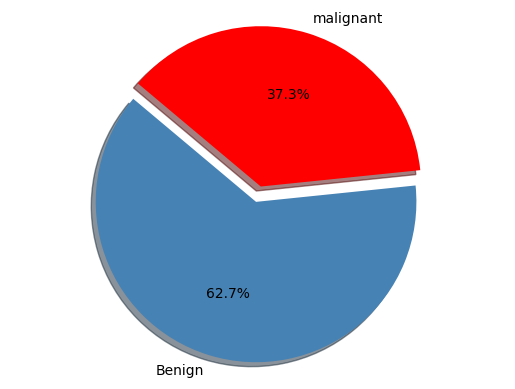

In [60]:
# Defining data for the chart
labels = 'Benign', 'malignant'
colors = ['steelblue', 'red']
explode = (0.1, 0)  # explode 1st slice

# Plotting the chart
plt.pie(df['diagnosis'].value_counts(), explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [61]:
#split dataframe
df_list = [d for _, d in df.groupby(['diagnosis'])]
df_list

<ipython-input-61-55e0824cbafd>:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  df_list = [d for _, d in df.groupby(['diagnosis'])]


[           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
 19    8510426         B       13.540         14.36           87.46      566.3   
 20    8510653         B       13.080         15.71           85.63      520.0   
 21    8510824         B        9.504         12.44           60.34      273.9   
 37     854941         B       13.030         18.42           82.61      523.8   
 46   85713702         B        8.196         16.84           51.71      201.9   
 ..        ...       ...          ...           ...             ...        ...   
 558    925277         B       14.590         22.68           96.39      657.1   
 559    925291         B       11.510         23.93           74.52      403.5   
 560    925292         B       14.050         27.15           91.38      600.4   
 561    925311         B       11.200         29.37           70.67      386.0   
 568     92751         B        7.760         24.54           47.92      181.0   
 
      smoothne

In [62]:
# Define a mapping dictionary for conversion
diagnosis_mapping = {'M': 1, 'B': 0}

# Apply the mapping to the 'diagnosis' column
df['diagnosis'] = df['diagnosis'].map(diagnosis_mapping)

In [63]:
#Statistical values of the dataset
#df.describe()

In [64]:
# Save the table to an Excel file named 'table.xlsx'
#df.describe().to_excel('table.xlsx')

In [65]:
#df_list[0].describe()

In [66]:
#df_list[1].describe()

The above result shows that our data has no missingness except for the unnamed column which only contains NAs.

The 'diagnosis' column is a categorical variable with two unique values (e.g., 'M' for malignant and 'B' for benign).

## Correlations matrix

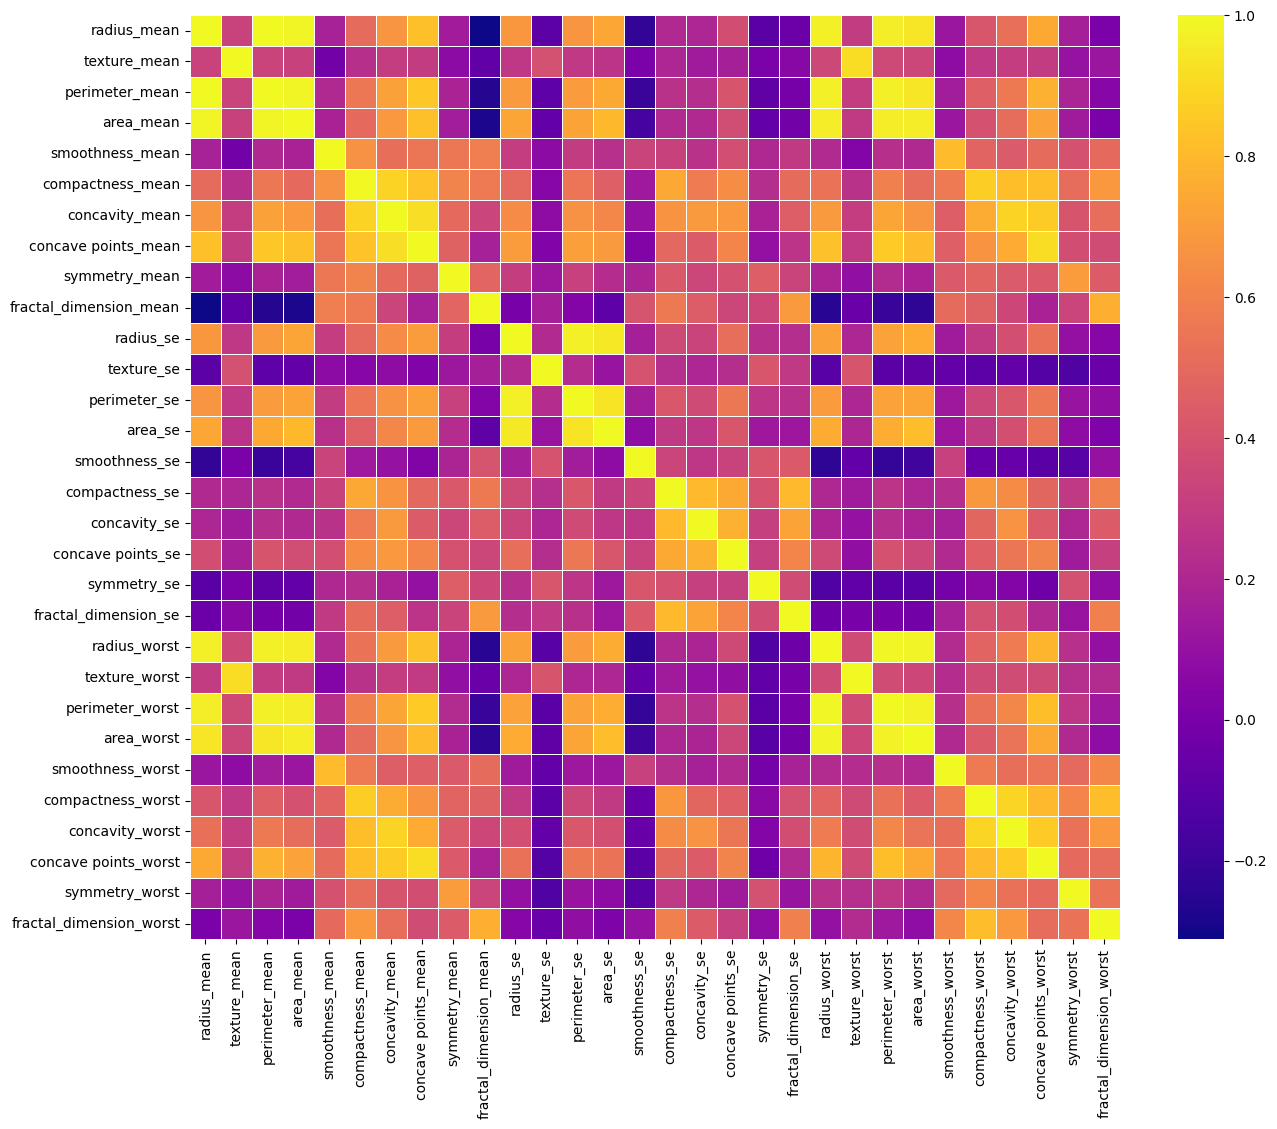

In [67]:
#remove diagnosis and ID
df_corr = df.drop(['id', 'diagnosis'], axis=1).corr()

# Increase the size of the plot
plt.figure(figsize=(15, 12))
sns.heatmap(df_corr, annot=False, cmap='plasma', fmt='.0%', linewidths=.5) #Viridis

#sns.heatmap(df.iloc[:,1:].corr(), annot=False, cmap='plasma', fmt='.0%', linewidths=.5)

plt.show()

In [68]:
#import pandas as pd
#from sklearn.feature_selection import VarianceThreshold

# Using VarianceThreshold to remove highly correlated predictors
#selector = VarianceThreshold(threshold=0.9)
#highly_correlated_predictors = df_corr[df_corr > 0.9].columns
#highly_correlated_predictors
#df2 = df.drop(columns=selector.fit(df_corr).get_support(indices=True))
# Create a new data frame without the highly correlated predictors
#df2 = df.drop(columns=highly_correlated_predictors)
#df2
# Number of columns for our new data frame
#print(df2.shape[1])


In [69]:
# Selecting a subset of the mean of the observations of the tumor for visualization
subset_data=df.iloc[:,1:12]
subset_data

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  
0           0.2419                 0.07871  
1           0.1812                 0.05667  
2           0.2069                 0.05999  
3           0.2597                 0.09744  
4           0.1809                 0.05883  
..             ...                     ...  
564         0.1726                 0.05623  
565         0.1752                 0.05533  
566         0.1590                 0.05648  
567         0.2397                 0.07016  
568         0.1587                 0.05884  

[569 rows x 11 columns]

In [70]:
tumorFeatures = subset_data.columns

In [71]:
label = subset_data.columns

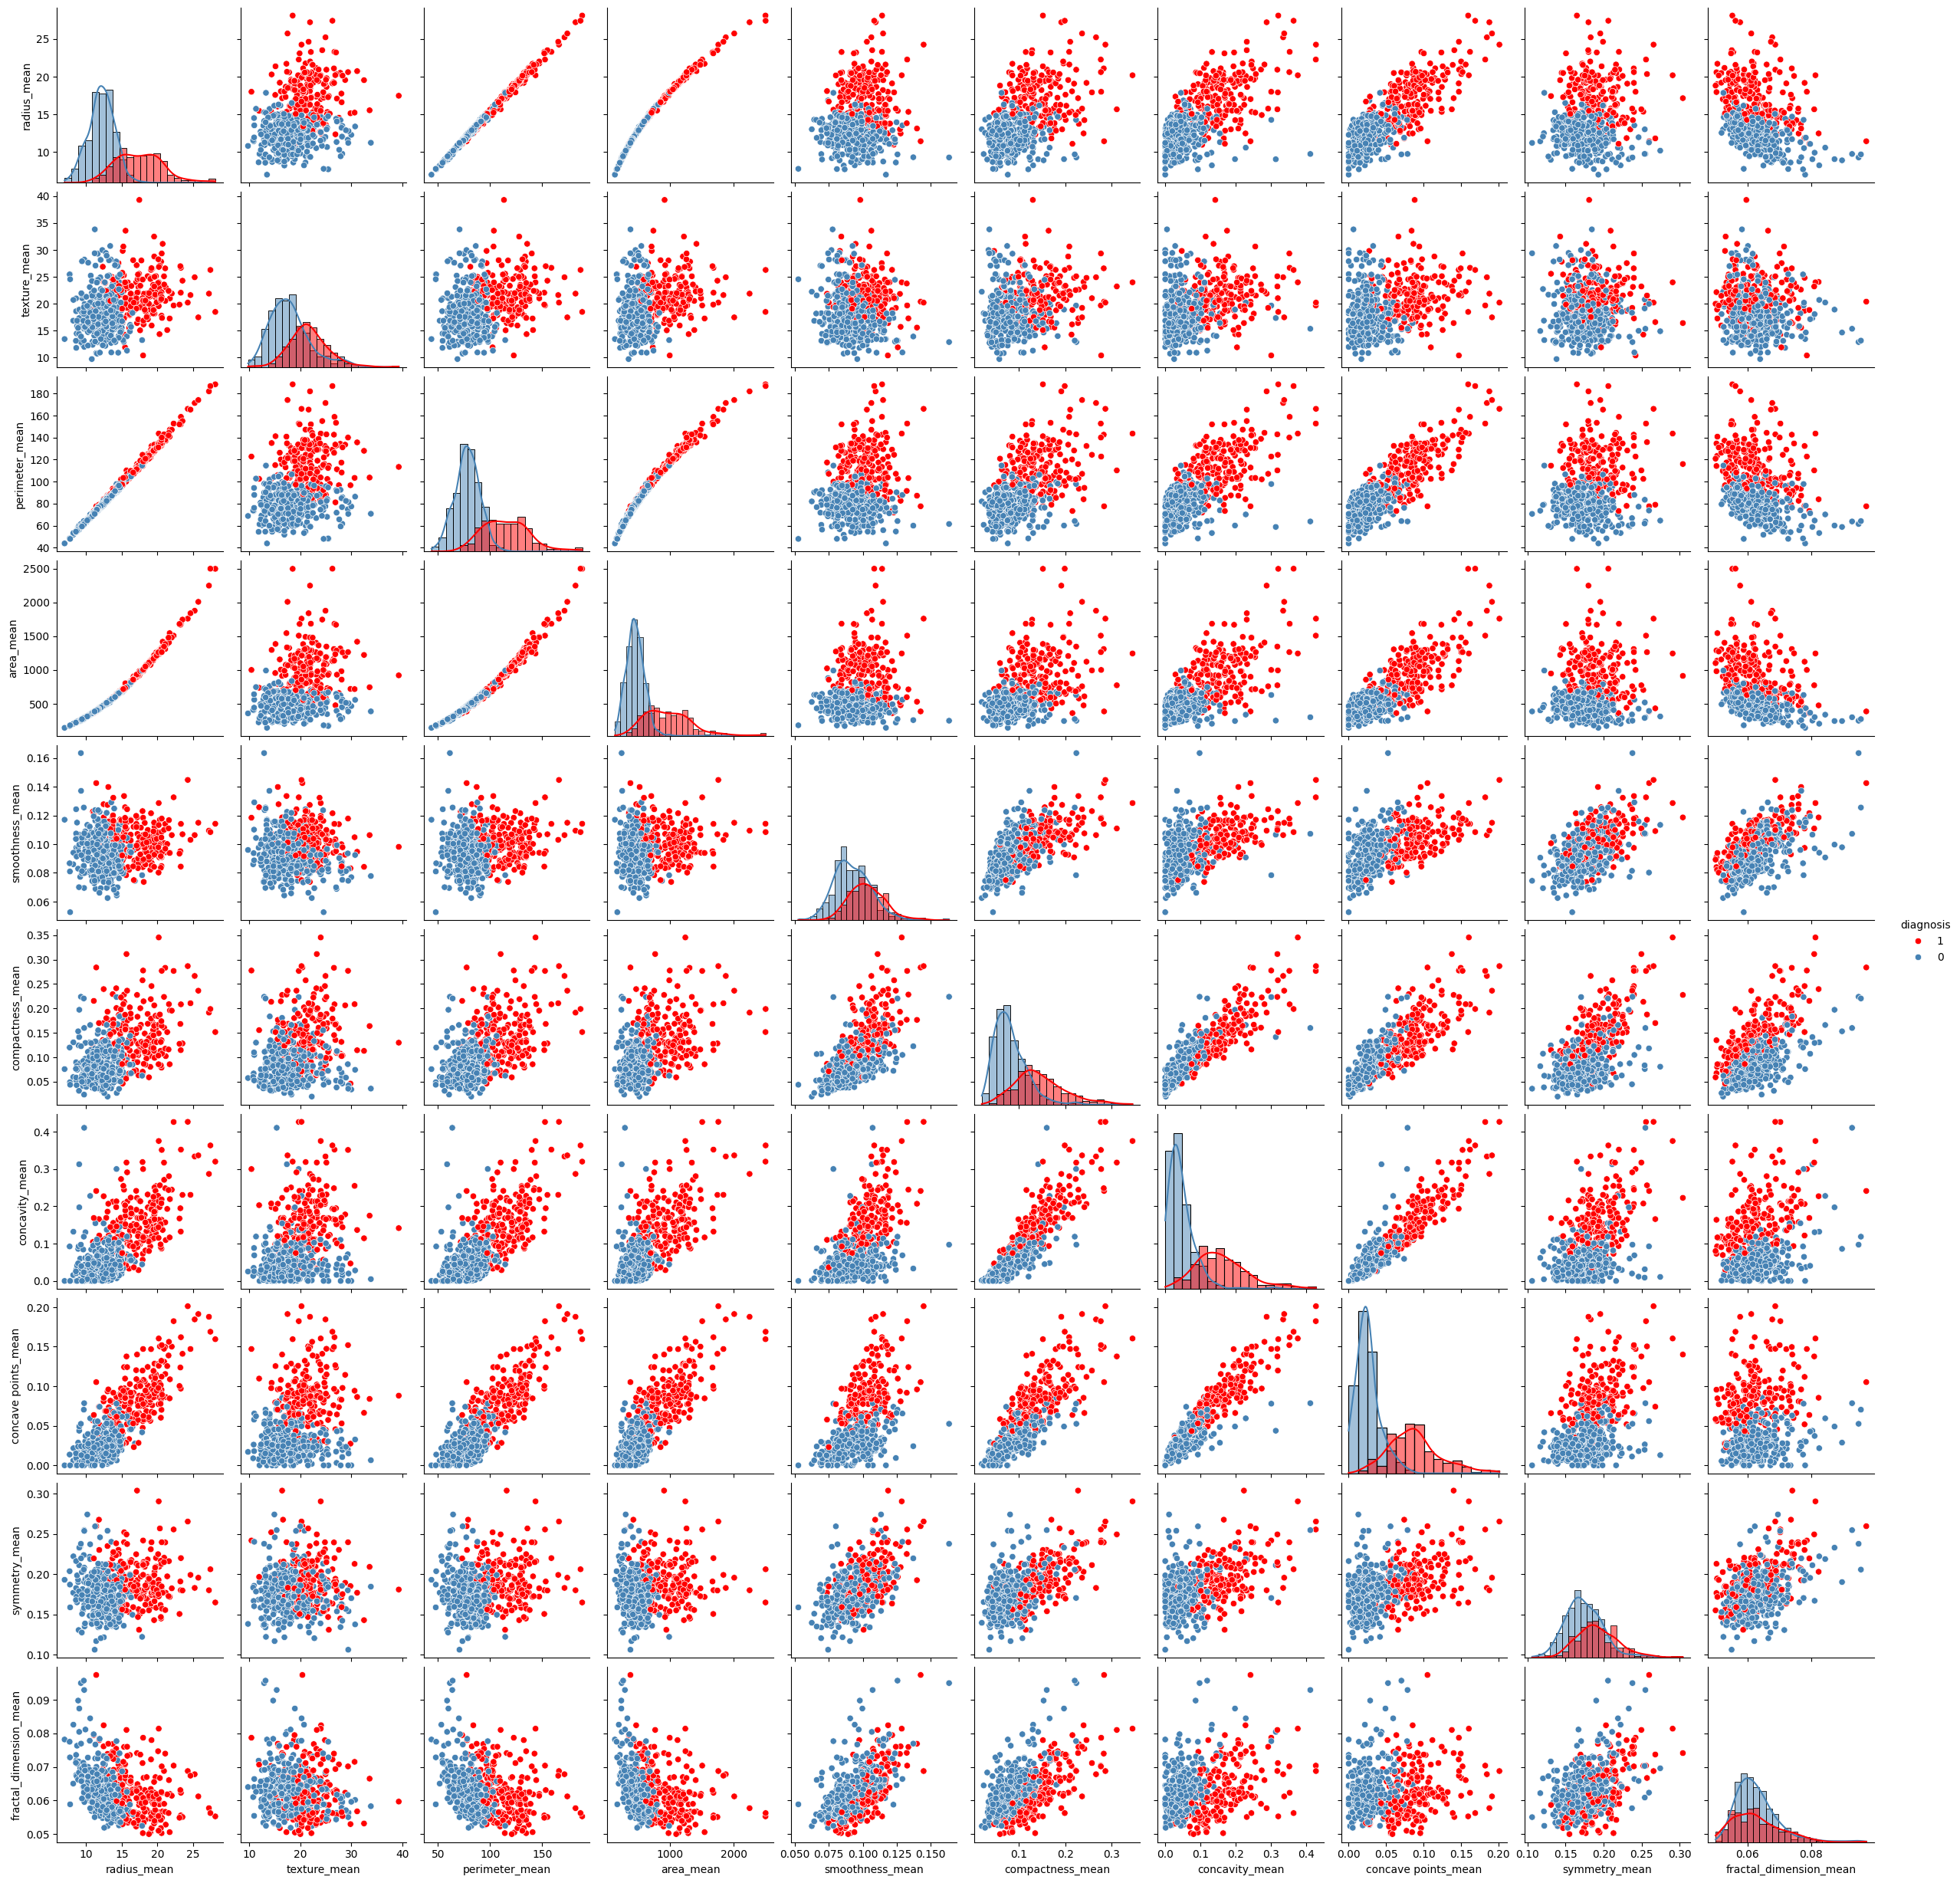

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Predefine 'colors' and 'labels'
colors = {1: 'red', 0: 'steelblue'}  # Example colors dictionary
labels = {1: 'Malignant', 0: 'Benign'}  # Example labels dictionary

# Pair plot with diagnosis as hue
g = sns.pairplot(subset_data, hue='diagnosis', palette=colors, hue_order=[1, 0], diag_kind='hist', diag_kws={'kde': True})
# Increase label font size
#g.set_xlabel(subset_data.columns, fontsize=14)
#g.set_ylabel(subset_data.columns, fontsize=14)

# Show the plot
plt.show()
# Customize legend using set_title and set_labels
g._legend.set_title('Diagnosis')
for i, label in enumerate(labels.values()):
    g._legend.texts[i].set_text(label)

# Show the plot
plt.show()

### Box plot

<ipython-input-73-f6783af86972>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data['radius_mean'], x=data['diagnosis'], palette=['red', 'steelblue'], linewidth=3, notch = True)
<ipython-input-73-f6783af86972>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data['texture_mean'], x=data['diagnosis'], palette=['red', 'steelblue'], linewidth=3, notch = True)
<ipython-input-73-f6783af86972>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data['perimeter_mean'], x=data['diagnosis'], palette=['red', 'steelblue'], linewidth=3, notch = Tr

<Axes: xlabel='diagnosis', ylabel='fractal_dimension_mean'>

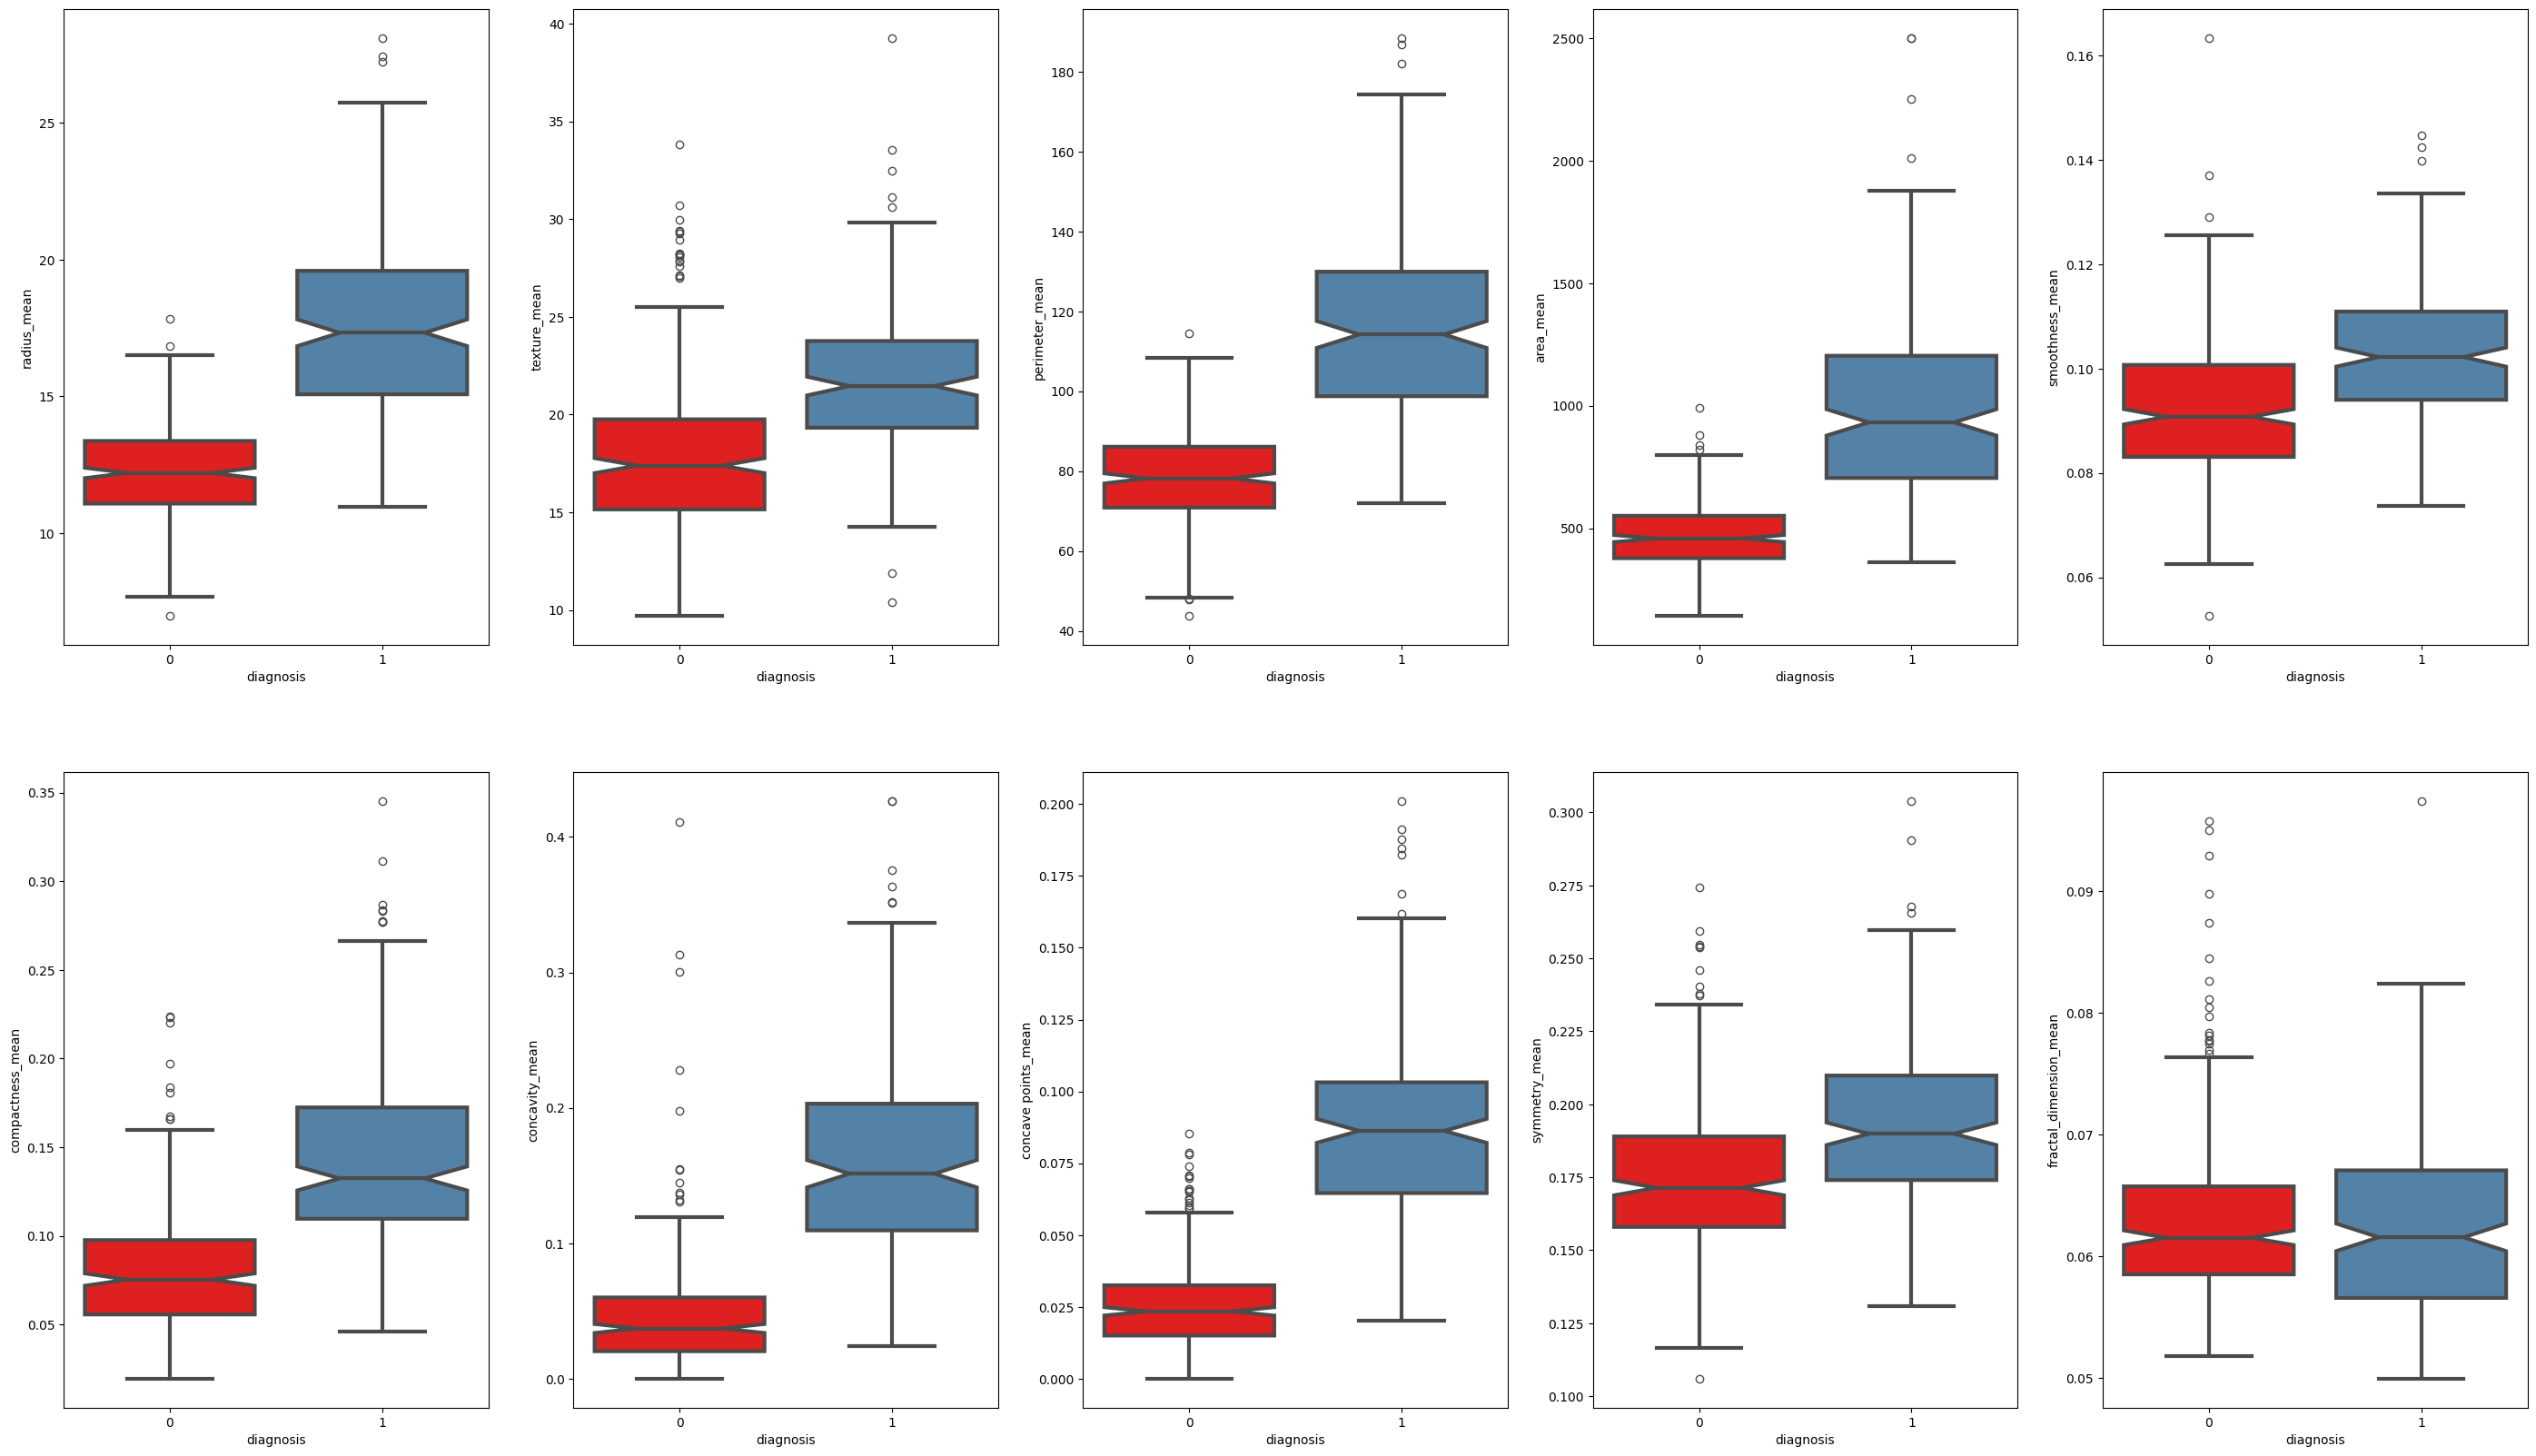

In [73]:
data = df

fig = plt.figure(figsize = (35,20))

fig.add_subplot(2, 5, 1)
sns.boxplot(y=data['radius_mean'], x=data['diagnosis'], palette=['red', 'steelblue'], linewidth=3, notch = True)

fig.add_subplot(2, 5, 2)
sns.boxplot(y=data['texture_mean'], x=data['diagnosis'], palette=['red', 'steelblue'], linewidth=3, notch = True)

fig.add_subplot(2, 5, 3)
sns.boxplot(y=data['perimeter_mean'], x=data['diagnosis'], palette=['red', 'steelblue'], linewidth=3, notch = True)

fig.add_subplot(2, 5, 4)
sns.boxplot(y=data['area_mean'], x=data['diagnosis'], palette=['red', 'steelblue'], linewidth=3, notch = True)

fig.add_subplot(2, 5, 5)
sns.boxplot(y=data['smoothness_mean'], x=data['diagnosis'], palette=['red', 'steelblue'], linewidth=3, notch = True)

fig.add_subplot(2, 5, 6)
sns.boxplot(y=data['compactness_mean'], x=data['diagnosis'], palette=['red', 'steelblue'], linewidth=3, notch = True)

fig.add_subplot(2, 5, 7)
sns.boxplot(y=data['concavity_mean'], x=data['diagnosis'], palette=['red', 'steelblue'], linewidth=3, notch = True)

fig.add_subplot(2, 5, 8)
sns.boxplot(y=data['concave points_mean'], x=data['diagnosis'], palette=['red', 'steelblue'], linewidth=3, notch = True)

fig.add_subplot(2, 5, 9)
sns.boxplot(y=data['symmetry_mean'], x=data['diagnosis'], palette=['red', 'steelblue'], linewidth=3, notch = True)

fig.add_subplot(2, 5, 10)
sns.boxplot(y=data['fractal_dimension_mean'], x=data['diagnosis'], palette=['red', 'steelblue'], linewidth=3, notch = True)

# 4) Data Standardisation
Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model.
Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data

In [74]:
df_drop=df.drop(labels='id',axis=1)
df_drop.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

Now we need to bring "left" column to the front as it is the label and not the feature.

In [75]:
cols = df_drop.columns.tolist()
cols

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

Here we are converting columns of the dataframe to list so it would be easier for us to reshuffle the columns.We are going to use cols.insert method


In [76]:
#cols.insert(0, cols.pop(cols.index('left')))

In [77]:
#cols

In [78]:
#df_drop = df_drop.reindex(columns= cols)

By using df_drop.reindex(columns= cols) we are converting list to columns again

Now we are separating features of our dataframe from the labels.

## Supervised ML (Logistic Regression)

In [79]:
X = df_drop.iloc[:,1:31].values
y = df_drop.iloc[:,0].values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [80]:
# Convert the numpy array to a pandas Series
y = pd.Series(y)

# Replace the values as specified
y = y.replace({'M': 0, 'B': 1})

# Convert the pandas Series back to a numpy array
y = y.to_numpy()

# Display the updated Series
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [81]:
np.shape(X)

(569, 30)

Thus X is now a matrix with 569 rows and 30 columns

In [82]:
np.shape(y)

(569,)

y is now matrix with 569 rows and 1 column

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =  21)

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


Standard Scaler z = (x - u) / s

(data - mean) / standard_dev

**Perform preprocessing**

In [85]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [86]:
X_train_scaled = scaler.fit_transform(X_train)

In [87]:
X_test_scaled = scaler.transform(X_test)

In [88]:
X_train_scaled

array([[-0.88672765, -1.0598374 , -0.91038179, ..., -0.93288294,
        -0.52907458,  0.423381  ],
       [ 0.60997567, -0.32275826,  0.58816236, ...,  0.09990184,
        -0.19526138, -0.13507102],
       [ 1.3034976 ,  0.56082109,  1.23857963, ...,  0.35481389,
         0.328594  , -0.44110273],
       ...,
       [ 2.26968628, -0.50588351,  2.13021124, ...,  1.04448392,
        -0.66127783, -1.0643352 ],
       [-0.59331452, -1.10561872, -0.57741984, ..., -0.77774628,
        -0.2696257 , -0.05521238],
       [ 0.87671487,  0.18312525,  0.78630272, ..., -0.08776348,
         0.60291574, -1.0782965 ]])

In [89]:
log_reg = LogisticRegression(random_state = 0,
                             C = 1,
                             fit_intercept = True,
                             ).fit(X_train_scaled, y_train)

In [90]:
log_reg.score(X_train_scaled, y_train)

0.9899497487437185

In [91]:
log_reg.score(X_test_scaled, y_test)

0.9766081871345029

In [92]:
y_pred1 = log_reg.predict(X_test_scaled)

In [93]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.94      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [94]:
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)


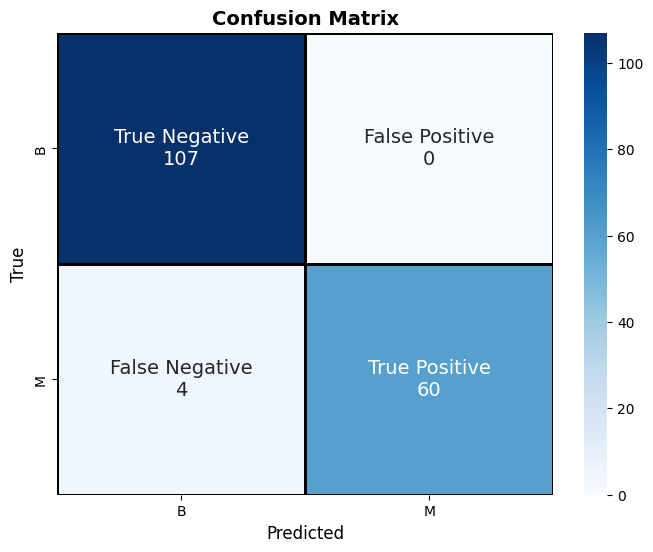

In [95]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
group_names = ["True Negative","False Positive",'False Negative',"True Positive"]
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
#group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', annot_kws={"size": 14}, linewidths = 1, linecolor = "black",
           xticklabels=["B", "M"],
   yticklabels=["B", "M"])
#sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.show()

In [96]:
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 5)):
    """
    Plots a learning curve. http://scikit-learn.org/stable/modules/learning_curve.html
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r",
             label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g",
             label = "Cross-validation score")
    plt.legend(loc = "best")
    return plt

In [97]:
#from sklearn.model_selection import learning_curve
#Learning curve Log with best hyperpara
#plot_learning_curve(log_reg, 'Learning Curve For Logistic Model', X, y, (0.85,1.05), 10)
#plt.savefig('7')
#plt.show()

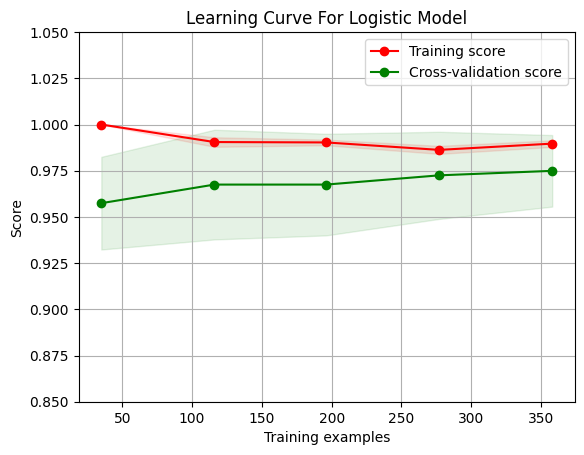

In [98]:
from sklearn.model_selection import learning_curve

# Learning Curve Log with best hyperpara
plot_learning_curve(log_reg, 'Learning Curve For Logistic Model', X_train_scaled, y_train, (0.85,1.05), 10)
plt.savefig('7')
plt.show()

# PCA in scikit-learn

# Principal Component Analysis

In [99]:
from sklearn.decomposition import PCA

X_std = StandardScaler().fit_transform(X)

<ipython-input-100-b5a49938c8af>:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,30,1)


Text(0, 0.5, 'Cumulative explained variance')

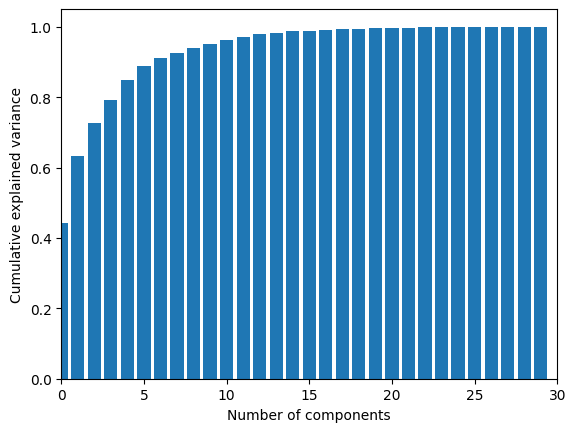

In [100]:
pca = PCA().fit(X_std)
plt.bar(range(30),np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,30,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

The above plot shows almost 90% variance by the first 10 more than components. Therfore we can drop the last 20 components.

In [101]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=15)
X_sklearn = sklearn_pca.fit_transform(X_std)

In [102]:
print(X_sklearn)

[[ 9.19283683e+00  1.94858307e+00 -1.12316616e+00 ...  1.03387095e-01
  -6.90804758e-01 -6.01796323e-01]
 [ 2.38780180e+00 -3.76817174e+00 -5.29292687e-01 ... -9.43529294e-01
  -6.53475976e-01  8.96884762e-03]
 [ 5.73389628e+00 -1.07517380e+00 -5.51747593e-01 ... -4.10626586e-01
   1.66796239e-02  4.83418371e-01]
 ...
 [ 1.25617928e+00 -1.90229671e+00  5.62730526e-01 ...  1.57417965e-01
   2.85690990e-01  9.09987884e-02]
 [ 1.03747941e+01  1.67201011e+00 -1.87702933e+00 ...  1.22519447e+00
   2.18696365e-01  2.29581457e-01]
 [-5.47524330e+00 -6.70636791e-01  1.49044308e+00 ...  6.78898368e-01
  -1.17072270e+00  2.17357068e-01]]


In [103]:
X_sklearn.shape

(569, 15)

## Kmeans Clustering

In [104]:
#Import packages
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [105]:
inertias = []

for i in range(1,16):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_sklearn)
    inertias.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

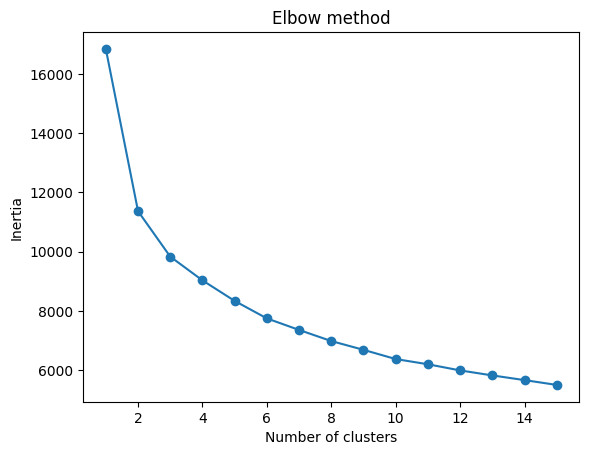

In [106]:
plt.plot(range(1,16), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The elbow method shows that 2 is a good value for K

In [107]:
#We have chosen 2 clusters so we run Kmeans with chosen cluster
kmeans_pca = KMeans(n_clusters=2, random_state=42)


In [108]:
#Fit model with Kmeans PCA model
kmeans_pca.fit(X_sklearn)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [109]:
#Investigate results
print(kmeans_pca.labels_)
print(kmeans_pca.cluster_centers_)

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 1 1 1 0 

In [110]:
# Create a DataFrame with the PCA results
column_names = [f'PC{i}' for i in range(1, 16)]  # Generate column names from PC1 to PC15
sk_pca_df = pd.DataFrame(data=X_sklearn, columns=column_names)

In [111]:
# Concatenate the PCA DataFrame with the target variable y which contains information about the diagnosis
sk_pca_df['diagnosis'] = y

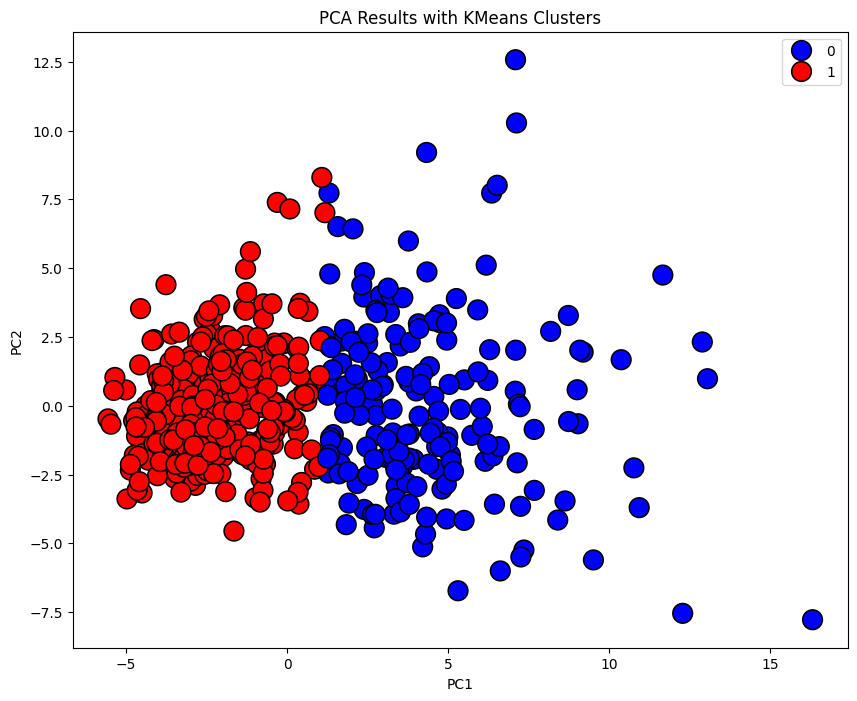

In [112]:
custom_palette = {1: 'red', 0: 'blue'}

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue=kmeans_pca.labels_, data=sk_pca_df, palette=custom_palette, s=200, edgecolor='black')
plt.title('PCA Results with KMeans Clusters')

# Customize legend labels
#plt.legend(labels=['Malignant', 'Benign'])
plt.show()

##Logistic regression on PCA

In [113]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sklearn, y, test_size = 0.3, random_state =  21)
#random state allows us to regenerate the same train test split if nessesary

In [114]:
X_train

array([[-3.78509923, -0.32614637, -1.0580802 , ...,  0.07125763,
        -0.27923841,  0.1559173 ],
       [ 1.34502044, -1.27477096,  0.55584355, ..., -0.11181319,
        -0.11206463, -0.18892925],
       [ 2.17141602, -2.82626073, -0.56210749, ..., -0.08002075,
         0.08613593, -0.24028029],
       ...,
       [ 5.30714002, -6.72341498,  1.48566485, ..., -0.92339357,
         0.32552738, -0.62066335],
       [-2.13644528,  0.09582961, -1.49241189, ...,  0.39391572,
         0.6000386 ,  0.16920308],
       [ 0.4465444 , -2.78770774,  0.44438227, ..., -0.11928514,
         0.20766268,  0.34070932]])

In [115]:
X_test

array([[-4.69492345e+00, -7.67477944e-01,  1.54396484e+00, ...,
         1.04993558e+00, -3.21232335e-01,  1.16844078e-01],
       [ 3.93098664e-01,  1.08306806e+00,  2.24760551e+00, ...,
        -6.36259110e-01,  2.33088168e-01,  1.85272162e-01],
       [ 3.93530207e+00, -1.94807157e+00,  1.38976673e+00, ...,
         3.87948073e-01, -5.39180376e-01,  3.10320561e-01],
       ...,
       [ 6.35174679e+00,  7.72717407e+00, -4.34191581e+00, ...,
        -3.75804892e-01, -6.01912875e-04,  1.20721713e+00],
       [-4.38642297e+00, -7.61103730e-01, -4.00597421e-01, ...,
         1.23184042e-01,  2.00526459e-02, -2.62293659e-01],
       [-5.61831043e-02, -2.27383393e-01, -2.25551565e+00, ...,
         5.60048065e-01,  3.18239303e-02, -3.97987007e-02]])

In [116]:
scaler = StandardScaler()

In [117]:
X_train_scaled = scaler.fit_transform(X_train)

In [118]:
X_test_scaled = scaler.transform(X_test)

In [119]:
X_train_scaled

array([[-1.06422672, -0.12766161, -0.61930817, ...,  0.16290634,
        -0.72410447,  0.52894809],
       [ 0.39586556, -0.53840897,  0.40017684, ..., -0.21818453,
        -0.31027522, -0.67731374],
       [ 0.63106744, -1.21019243, -0.30601162, ..., -0.15200353,
         0.18035908, -0.85693797],
       ...,
       [ 1.5235313 , -2.89763108,  0.98752732, ..., -1.90761747,
         0.77295911, -2.18750534],
       [-0.59500045,  0.05505083, -0.89366726, ...,  0.83457019,
         1.45249616,  0.57542132],
       [ 0.14014873, -1.19349928,  0.32976886, ..., -0.23373856,
         0.48119171,  1.17534447]])

In [120]:
X_test_scaled

array([[-1.32317337e+00, -3.18754885e-01,  1.02435431e+00, ...,
         2.20017932e+00, -8.28058073e-01,  3.92271262e-01],
       [ 1.24937448e-01,  4.82517695e-01,  1.46883077e+00, ...,
        -1.30990167e+00,  5.44131065e-01,  6.31630438e-01],
       [ 1.13309012e+00, -8.29943094e-01,  9.26950289e-01, ...,
         8.22147596e-01, -1.36757615e+00,  1.06904560e+00],
       ...,
       [ 1.82083865e+00,  3.35936590e+00, -2.69364483e+00, ...,
        -7.67725014e-01, -3.43555497e-02,  4.20636013e+00],
       [-1.23537051e+00, -3.15994898e-01, -2.03988777e-01, ...,
         2.70999384e-01,  1.67736454e-02, -9.33940007e-01],
       [-2.93341717e-03, -8.48979843e-02, -1.37570543e+00, ...,
         1.18040095e+00,  4.59127959e-02, -1.55659998e-01]])

In [121]:
from sklearn.linear_model import LogisticRegression
log_reg1 = LogisticRegression(random_state = 0,
                             C = 1,
                             fit_intercept = True,
                             ).fit(X_train_scaled, y_train) #C is a regularization parameter


In [122]:
log_reg1.score(X_train_scaled, y_train)

0.9824120603015075

In [123]:
log_reg1.score(X_test_scaled, y_test)

0.9766081871345029

In [124]:
y_pred = log_reg1.predict(X_test_scaled)

In [125]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.94      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



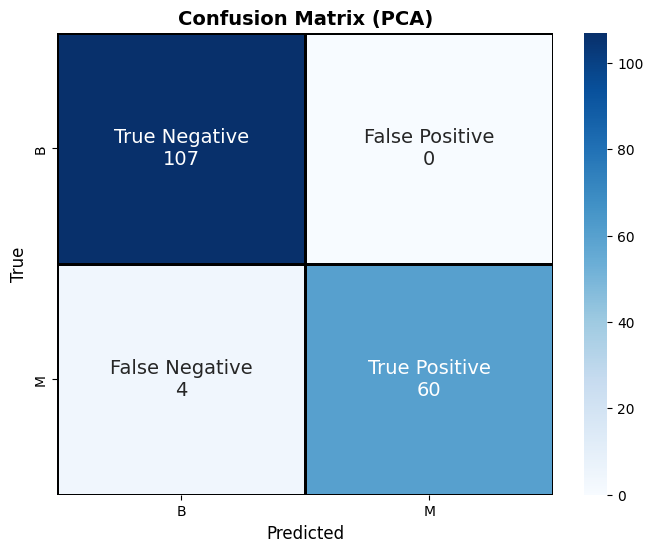

In [126]:
#y_pred = log_reg.predict(X_train_scaled)

cm = confusion_matrix(y_test, y_pred)
group_names = ["True Negative","False Positive",'False Negative',"True Positive"]
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
#group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', annot_kws={"size": 14}, linewidths = 1, linecolor = "black",
           xticklabels=["B", "M"],
   yticklabels=["B", "M"])
#sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

plt.title('Confusion Matrix (PCA)', fontsize=14, fontweight='bold')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.show()


In [127]:
#from sklearn.model_selection import learning_curve

# Learning Curve Log with best hyperpara
#plot_learning_curve(log_reg1, 'Learning Curve For Logistic Model (PCA)', X_sklearn, y, (0.85,1.05), 10)
#plt.savefig('7')
#plt.show()

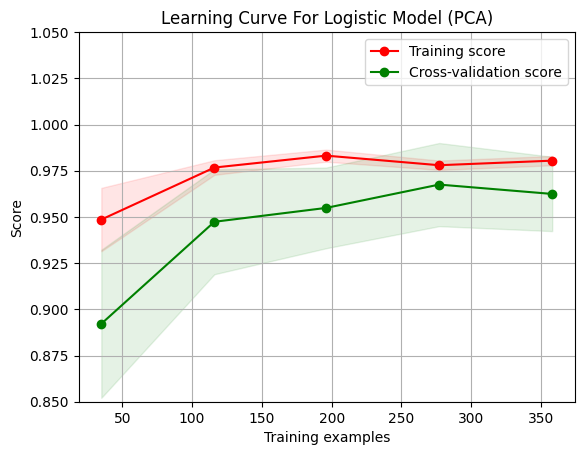

In [128]:
from sklearn.model_selection import learning_curve

# Learning Curve Log with best hyperpara
plot_learning_curve(log_reg1, 'Learning Curve For Logistic Model (PCA)', X_train_scaled, y_train, (0.85,1.05), 10)
plt.savefig('7')
plt.show()